### DESCRIPTION

The dataset was designed to analyze the performance of all cricket players at the ICC 2019 Cricket World Cup. The dataset was gotten from ESPN Cricinfo, only games played uptill 18th May 2019 are seen in the dataset.

We will be performing Prediction on the players perfomance using the BOWLER DATA

### IMPORT THE LIBRARIES

In [1]:
#for data wrangling
import numpy as np 
import pandas as pd 

#for data visalization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set

import warnings
warnings.filterwarnings("ignore")

### LOAD THE DATA

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\HP'

In [4]:
os.chdir('C:\\Users\\HP\Downloads')

In [5]:
data = pd.read_csv('Bowler_data.csv')

In [6]:
data

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0,57,0,7.12,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619
2,3,-,-,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Suranga Lakmal,49619
3,4,9.0,1,63,2,7.00,31.50,27.0,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Suranga Lakmal,49619
4,5,8.0,1,48,0,6.00,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Suranga Lakmal,49619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11113,11114,4.0,0,41,0,10.25,-,-,v India,Dubai (DSC),25 Sep 2018,ODI # 4046,Gulbadin Naib,352048
11114,11115,7.2,0,20,2,2.72,10.00,22.0,v Ireland,Dehradun,28 Feb 2019,ODI # 4100,Gulbadin Naib,352048
11115,11116,-,-,-,-,-,-,-,v Ireland,Dehradun,2 Mar 2019,ODI # 4101,Gulbadin Naib,352048
11116,11117,6.0,0,21,1,3.50,21.00,36.0,v Ireland,Dehradun,8 Mar 2019,ODI # 4108,Gulbadin Naib,352048


From the data above we can observe the presence missing values indicated as -  

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11118 entries, 0 to 11117
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11118 non-null  int64 
 1   Overs       11118 non-null  object
 2   Mdns        11118 non-null  object
 3   Runs        11118 non-null  object
 4   Wkts        11118 non-null  object
 5   Econ        11118 non-null  object
 6   Ave         11118 non-null  object
 7   SR          11118 non-null  object
 8   Opposition  11118 non-null  object
 9   Ground      11118 non-null  object
 10  Start Date  11118 non-null  object
 11  Match_ID    11118 non-null  object
 12  Bowler      11118 non-null  object
 13  Player_ID   11118 non-null  int64 
dtypes: int64(2), object(12)
memory usage: 1.2+ MB


### DATA PREPROCESSING

In [8]:
#Replacing all the '-' with 0s to make the dtypes of a column uniform
data['Overs'] = data['Overs'].str.replace('-', '0')
data['Mdns'] = data['Mdns'].str.replace('-', '0')
data['Runs'] = data['Runs'].str.replace('-', '0')
data['Wkts'] = data['Wkts'].str.replace('-', '0')
data['Econ'] = data['Econ'].str.replace('-', '0')
data['Ave'] = data['Ave'].str.replace('-', '0')
data['SR'] = data['SR'].str.replace('-', '0')

In [9]:
data

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0,57,0,7.12,0,0,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619
2,3,0,0,0,0,0,0,0,v India,Delhi,27 Dec 2009,ODI # 2936,Suranga Lakmal,49619
3,4,9.0,1,63,2,7.00,31.50,27.0,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Suranga Lakmal,49619
4,5,8.0,1,48,0,6.00,0,0,v India,Dhaka,5 Jan 2010,ODI # 2938,Suranga Lakmal,49619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11113,11114,4.0,0,41,0,10.25,0,0,v India,Dubai (DSC),25 Sep 2018,ODI # 4046,Gulbadin Naib,352048
11114,11115,7.2,0,20,2,2.72,10.00,22.0,v Ireland,Dehradun,28 Feb 2019,ODI # 4100,Gulbadin Naib,352048
11115,11116,0,0,0,0,0,0,0,v Ireland,Dehradun,2 Mar 2019,ODI # 4101,Gulbadin Naib,352048
11116,11117,6.0,0,21,1,3.50,21.00,36.0,v Ireland,Dehradun,8 Mar 2019,ODI # 4108,Gulbadin Naib,352048


In [10]:
#we will change the data type to float

data['Overs'] = data['Overs'].astype(float)
data['Mdns'] = data['Mdns'].astype(float)
data['Runs'] = data['Runs'].astype(float)
data['Wkts'] = data['Wkts'].astype(float)
data['Econ'] = data['Econ'].astype(float)
data['Ave'] = data['Ave'].astype(float)
data['SR'] = data['SR'].astype(float)

data.dtypes

Unnamed: 0      int64
Overs         float64
Mdns          float64
Runs          float64
Wkts          float64
Econ          float64
Ave           float64
SR            float64
Opposition     object
Ground         object
Start Date     object
Match_ID       object
Bowler         object
Player_ID       int64
dtype: object

### Let us arrange some columns from the highest to lowest in descending order

In [11]:
#we will be checking the best bowler according to the matches played

best_bowler = data['Bowler'].value_counts()[:30]
best_bowler

MS Dhoni             341
Chris Gayle          289
Shoaib Malik         283
Virat Kohli          227
Eoin Morgan          221
Ross Taylor          218
Lasith Malinga       218
Mohammad Hafeez      209
Mashrafe Mortaza     209
Rohit Sharma         206
Mushfiqur Rahim      205
Angelo Mathews       203
Shakib Al Hasan      198
JP Duminy            194
Tamim Iqbal          193
Mahmudullah          175
Hashim Amla          174
Martin Guptill       169
Thisara Perera       153
Ravindra Jadeja      151
Tim Southee          139
Kane Williamson      139
Faf du Plessis       134
Joe Root             131
Jos Buttler          130
Shikhar Dhawan       128
Dale Steyn           125
David Miller         120
Lahiru Thirimanne    117
Mohammad Nabi        111
Name: Bowler, dtype: int64

### DATA VISUALIZATION

In [12]:
#let us get the data for bowlers individually

individual_data = data.query('Bowler =="Ravindra Jadeja"')
individual_data

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
5383,5384,6.0,0.0,40.0,0.0,6.66,0.00,0.0,v Sri Lanka,Colombo (RPS),8 Feb 2009,ODI # 2818,Ravindra Jadeja,234675
5384,5385,7.0,1.0,34.0,0.0,4.85,0.00,0.0,v West Indies,Kingston,26 Jun 2009,ODI # 2852,Ravindra Jadeja,234675
5385,5386,2.0,0.0,12.0,0.0,6.00,0.00,0.0,v West Indies,Kingston,28 Jun 2009,ODI # 2853,Ravindra Jadeja,234675
5386,5387,9.0,0.0,39.0,1.0,4.33,39.00,54.0,v Australia,Vadodara,25 Oct 2009,ODI # 2913,Ravindra Jadeja,234675
5387,5388,6.3,0.0,35.0,3.0,5.38,11.66,13.0,v Australia,Nagpur,28 Oct 2009,ODI # 2915,Ravindra Jadeja,234675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5529,5530,9.0,0.0,53.0,0.0,5.88,0.00,0.0,v Australia,Melbourne,18 Jan 2019,ODI # 4079,Ravindra Jadeja,234675
5530,5531,10.0,0.0,33.0,0.0,3.30,0.00,0.0,v Australia,Hyderabad (Deccan),2 Mar 2019,ODI # 4102,Ravindra Jadeja,234675
5531,5532,10.0,0.0,48.0,1.0,4.80,48.00,60.0,v Australia,Nagpur,5 Mar 2019,ODI # 4106,Ravindra Jadeja,234675
5532,5533,10.0,0.0,64.0,0.0,6.40,0.00,0.0,v Australia,Ranchi,8 Mar 2019,ODI # 4109,Ravindra Jadeja,234675


In [15]:
# creating the variables for the column and using them to plot a scatter diagram

x = individual_data['Overs']
y1 = individual_data['Mdns']
y2 = individual_data['Runs']
y3 = individual_data['Wkts']
y4 = individual_data['Econ']
y5 = individual_data['Ave']
y6 = individual_data['SR']

Text(0.5, 1.0, 'Overs vs Strike Rate of bowlers')

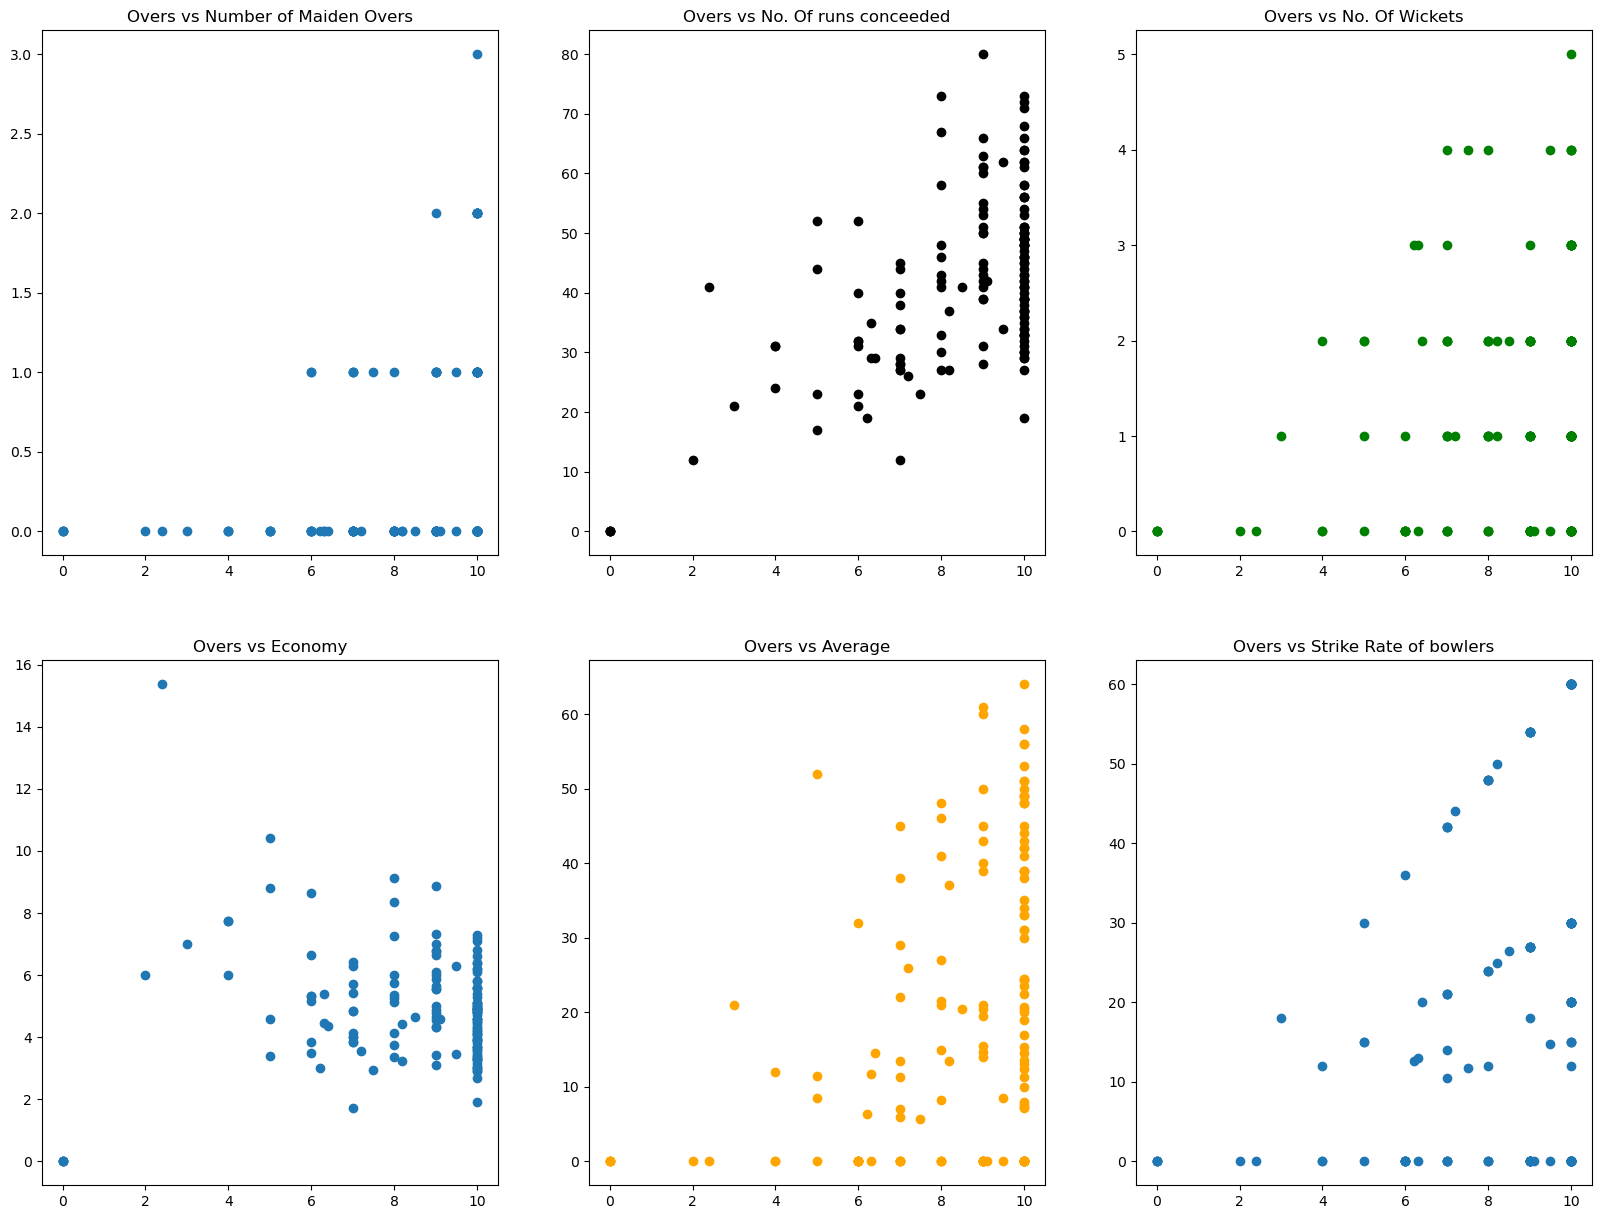

In [16]:
#plotting the grapg of Overs against the newly variables

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20, 15))
ax1.scatter(x, y1)
ax1.set_title('Overs vs Number of Maiden Overs')
ax2.scatter(x, y2, color='black')
ax2.set_title('Overs vs No. Of runs conceeded')
ax3.scatter(x, y3, color='green')
ax3.set_title('Overs vs No. Of Wickets')
ax4.scatter(x, y4)
ax4.set_title('Overs vs Economy')
ax5.scatter(x, y5, color='orange')
ax5.set_title('Overs vs Average')
ax6.scatter(x, y6)
ax6.set_title('Overs vs Strike Rate of bowlers')

### MODELLING 

We will extracting the data from the original set using it to perform prediction on the player performance

The following data will be used as input:
1. Wickets
2. Average
3. Economy is runs per over 
4. SR That's no. Of wickets/ balls bowled
5. Number of Maiden Overs
6. No. Of runs conceeded

The target is Overs

In [18]:
data_pred = data.iloc[:,1:7]
data_pred

,Overs,Mdns,Runs,Wkts,Econ,Ave
0,8.0,0.0,57.0,0.0,7.12,0.0
1,10.0,0.0,55.0,2.0,5.50,27.5
2,0.0,0.0,0.0,0.0,0.00,0.0
3,9.0,1.0,63.0,2.0,7.00,31.5
4,8.0,1.0,48.0,0.0,6.00,0.0
...,...,...,...,...,...,...
11113,4.0,0.0,41.0,0.0,10.25,0.0
11114,7.2,0.0,20.0,2.0,2.72,10.0
11115,0.0,0.0,0.0,0.0,0.00,0.0
11116,6.0,0.0,21.0,1.0,3.50,21.0


In [19]:
#by training the data we should import the train test split 
from sklearn.model_selection import train_test_split

#now let split the data
X = data_pred.drop('Overs', axis=1)
Y = data_pred["Overs"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.2, random_state=42)

### TRAIN THE MODEL

In [21]:
# Machine learning models
from sklearn.linear_model import LinearRegression

In [22]:
reg = LinearRegression()
reg.fit(X_train,Y_train)
Y_pred = reg.predict(X_test)
acc_log = round(reg.score(X_train, Y_train)*100,2)
acc_log

90.04

In [23]:
Y_pred

array([1.91524338, 4.95661439, 0.43559315, ..., 7.57786899, 0.43559315,
       8.84849337])

In [24]:
#now let us compare between the Overs and Y_pred
#create a dataframe on Overs and Y_pred

pd.DataFrame({'Overs': Y_test, 'Y_Pred':Y_pred})

,Overs,Y_Pred
1864,5.0,1.915243
3353,8.0,4.956614
4684,0.0,0.435593
3909,5.0,2.794431
9317,10.0,8.679206
...,...,...
8843,0.0,0.435593
3747,10.0,6.331375
2196,9.3,7.577869
8561,0.0,0.435593


In [25]:
# we should look for the coefficient of the regression to understand our linear regression model
reg.coef_

array([ 1.2760981 ,  0.16465081,  0.57337605, -0.15068578,  0.00282959])

In [26]:
#the intercept
reg.intercept_

0.4355931471654726

Therefore, the equation of our multiple linear regression model is:

Overs = 1.2760981xMdns + 0.16465081xRuns + 0.57337605xWkts - 0.15068578xEcon + 0.002829590xAve + 0.4355931471654726